In [14]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, recall_score, precision_score
import seaborn as sn


IN_FILE = '/home/wouter/Downloads/data_for_student_case.csv(1)/data_for_student_case.csv'

def plot_roc(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.grid(True)
    plt.show()

def plot_PRcurve(recall, precision):
    roc_auc = auc(recall, precision)
    plt.plot(recall, precision, 'r', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower left')
    plt.ylabel("Precision")
    plt.xlabel("Recall")
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.title("Precision-Recall curve")
    plt.grid(True)
    plt.show()

# def feature_importance(importances):
#     std = np.std([tree.feature_importances_ for tree in forest.estimators_],
#              axis=0)
#     indices = np.argsort(importances)[::-1]

#     # Print the feature ranking
#     print("Feature ranking:")

#     for f in range(X.shape[1]):
#         print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

#     # Plot the feature importances of the forest
#     plt.figure()
#     plt.title("Feature importances")
#     plt.bar(range(X.shape[1]), importances[indices],
#            color="r", yerr=std[indices], align="center")
#     plt.xticks(range(X.shape[1]), indices)
#     plt.xlim([-1, X.shape[1]])
#     plt.show()
    


def eval_classifier(clf):
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    # ROC
    fpr, tpr, _ = roc_curve(y_test, predictions)
    plot_roc(fpr, tpr)
    
    # PR
    precision, recall, _ = precision_recall_curve(y_test, predictions)
    plot_PRcurve(recall, precision)
    
    # Confusion Matrix
    print("TN", "FP")
    print("FN", "TP")
    confmat = confusion_matrix(y_test, predictions.astype(int))
    print(pd.DataFrame(confmat))
    measures = {'Accuracy': accuracy_score,
                'Precision': precision_score,
                'Recall': recall_score}
    for name in measures:
        print(name, measures[name](y_test, predictions.astype(int)))



In [15]:
data = pd.read_csv(IN_FILE)

features = pd.DataFrame()
# features['id'] = data['txid']

# Truth label- 1 = fraud, 0 = valid
labels = data['simple_journal'].apply(lambda x : 1 if int(x == 'Chargeback') else 0)
# labels = data['simple_journal'].apply(lambda x : 'fraud' if int(x == 'Chargeback') else 'valid')



features['amount'] = data['amount']
features['currencycode'] = pd.factorize(data['currencycode'])[0]
features['issuercountrycode'] = pd.factorize(data['issuercountrycode'])[0]
features['shoppercountrycode'] = pd.factorize(data['shoppercountrycode'])[0]
features['shopperinteraction'] = pd.factorize(data['shopperinteraction'])[0]
features['txvariantcode'] = pd.factorize(data['txvariantcode'])[0]
features['cardverificationcodesupplied'] = pd.factorize(data['cardverificationcodesupplied'])[0]
features['cvcresponsecode'] = pd.factorize(data['cvcresponsecode'])[0]
features['accountcode'] = pd.factorize(data['accountcode'])[0]
features['mail_id'] = pd.factorize(data['mail_id'])[0]
features['ip_id'] = pd.factorize(data['ip_id'])[0]
features['card_id'] = pd.factorize(data['card_id'])[0]



In [16]:
# Split in test/train sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4)
print("Legit/Fraud", Counter(labels))


Legit/Fraud Counter({0: 290037, 1: 345})


In [17]:
#SMOTE to balance data
sm = SMOTE(random_state=42)

X_train, y_train = sm.fit_resample(X_train, y_train)

print("Legit/Fraud", Counter(y_train))


Legit/Fraud Counter({0: 174026, 1: 174026})


KNN 20
TN FP
FN TP
        0     1
0  114742  1269
1      16   126
Accuracy 0.9889370055013645
Precision 0.09032258064516129
Recall 0.8873239436619719


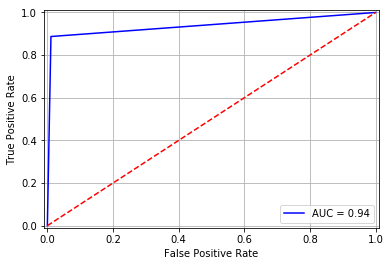

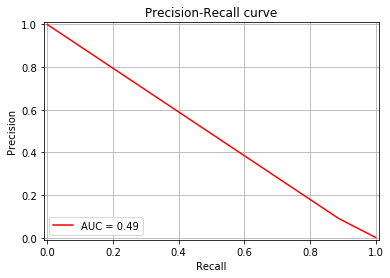

In [18]:
#KNN Classifier
neighbors = 20
print('KNN', neighbors)
clf = KNeighborsClassifier(n_neighbors=neighbors)
eval_classifier(clf)


DecisionTree
TN FP
FN TP
        0    1
0  115985   26
1      17  125
Accuracy 0.9996297986276721
Precision 0.8278145695364238
Recall 0.8802816901408451


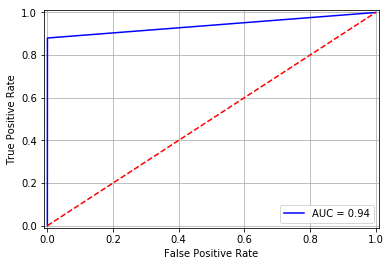

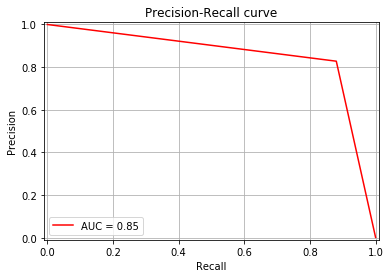

In [19]:
#DecisionTree Classifier
print('DecisionTree')
clf = DecisionTreeClassifier()
eval_classifier(clf)



RandomForest
TN FP
FN TP
        0    1
0  115985   26
1      19  123
Accuracy 0.9996125799591917
Precision 0.825503355704698
Recall 0.8661971830985915
[6.53011210e-02 2.49652198e-01 9.70731418e-02 1.10180349e-05
 8.19738347e-04 1.74056301e-04 5.76605337e-06 1.86856024e-01
 8.75906354e-05 7.99994359e-02 1.45825289e-01 1.74194621e-01]


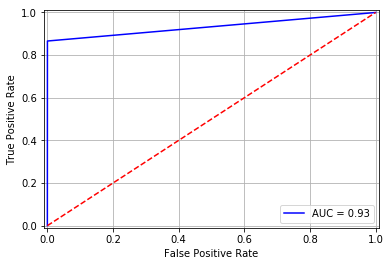

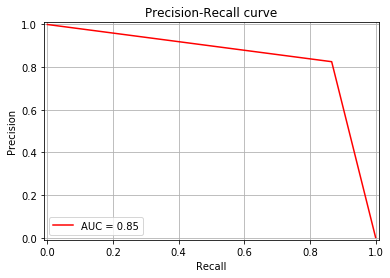

In [20]:
#Random Forrest Classifier
print('RandomForest')
clf = RandomForestClassifier(n_estimators=2)
eval_classifier(clf)
print(clf.feature_importances_)



AdaBoost
TN FP
FN TP
        0    1
0  115905  106
1       2  140
Accuracy 0.9990701919020603
Precision 0.5691056910569106
Recall 0.9859154929577465


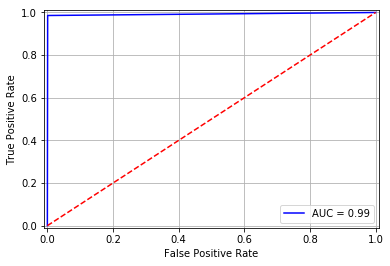

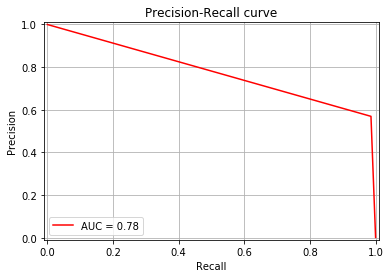

In [21]:
#AdaBoost Classifier
print('AdaBoost')
clf = AdaBoostClassifier()
eval_classifier(clf)


# # In[]:
# #SVM
# clf = SVC(kernel='linear')
# eval_classifier(clf)


# # In[]:
# #OvR
# clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), n_jobs=-1)
# eval_classifier(clf)



In [22]:
#Split data while preserving the imbanlanced class over the splits
skf = StratifiedKFold(n_splits=10, shuffle=True)
split, totalTN, totalFP, totalFN, totalTP = 0,0,0,0,0
for train_index, test_index in skf.split(features, labels):
    split += 1
    #Select the data for this round
    X_train, X_test = features.loc[train_index], features.loc[test_index]    
    y_train, y_test = labels[train_index], labels[test_index]
    
    #Use SMOTE on training data to get balanced data
    # sm = SMOTE(random_state=42)
    # X_train, y_train = sm.fit_resample(X_train, y_train)

    # Train classifier and predict
    clf = RandomForestClassifier(n_estimators=20)

    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    #Sum the confusion matrix values
    tn, fp, fn, tp = confusion_matrix(y_test, predictions.astype(int)).ravel()
    print('Split {}/10: \ntn {}\t fp {}\nfn {}\t\t tp {}'.format(split, tn, fp, fn, tp))
    totalTN += tn
    totalFP += fp
    totalFN += fn
    totalTP += tp

print("--- Total sum confmat ---")
print('tn {}\t fp {}\nfn {}\t\t tp {}'.format(totalTN, totalFP, totalFN, totalTP))

accuracy = (totalTP + totalTN) / (totalTP + totalTN + totalFN + totalFP)
precision = totalTP / (totalTP + totalFP)
recall = totalTP / (totalTP + totalFN)

print('accuracy\t{}\nprecision\t{}\nrecall\t{}'.format(accuracy, precision, recall))

    

Split 1/10: 
tn 29000	 fp 4
fn 8		 tp 27
Split 2/10: 
tn 29000	 fp 4
fn 4		 tp 31
Split 3/10: 
tn 29000	 fp 4
fn 7		 tp 28
Split 4/10: 
tn 29004	 fp 0
fn 4		 tp 31
Split 5/10: 
tn 28999	 fp 5
fn 6		 tp 29
Split 6/10: 
tn 29003	 fp 1
fn 6		 tp 28
Split 7/10: 
tn 29000	 fp 4
fn 3		 tp 31
Split 8/10: 
tn 28999	 fp 4
fn 2		 tp 32
Split 9/10: 
tn 29000	 fp 3
fn 8		 tp 26
Split 10/10: 
tn 28994	 fp 9
fn 4		 tp 30
--- Total sum confmat ---
tn 289999	 fp 38
fn 52		 tp 293
accuracy	0.9996900634336839
precision	0.8851963746223565
recall	0.8492753623188406


In [23]:
#Split data while preserving the imbanlanced class over the splits
skf = StratifiedKFold(n_splits=10, shuffle=True)
split, totalTN, totalFP, totalFN, totalTP = 0,0,0,0,0
for train_index, test_index in skf.split(features, labels):
    split += 1
    #Select the data for this round
    X_train, X_test = features.loc[train_index], features.loc[test_index]    
    y_train, y_test = labels[train_index], labels[test_index]
    
    #Use SMOTE on training data to get balanced data
    # sm = SMOTE(random_state=42)
    # X_train, y_train = sm.fit_resample(X_train, y_train)

    # Train classifier and predict
    # clf = AdaBoostClassifier()
    clf = DecisionTreeClassifier()
    # clf = RandomForestClassifier(n_estimators=20)

    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    #Sum the confusion matrix values
    tn, fp, fn, tp = confusion_matrix(y_test, predictions.astype(int)).ravel()
    print('Split {}/10: \ntn {}\t fp {}\nfn {}\t\t tp {}'.format(split, tn, fp, fn, tp))
    totalTN += tn
    totalFP += fp
    totalFN += fn
    totalTP += tp

print("--- Total sum confmat ---")
print('tn {}\t fp {}\nfn {}\t\t tp {}'.format(totalTN, totalFP, totalFN, totalTP))

accuracy = (totalTP + totalTN) / (totalTP + totalTN + totalFN + totalFP)
precision = totalTP / (totalTP + totalFP)
recall = totalTP / (totalTP + totalFN)

print('accuracy\t{}\nprecision\t{}\nrecall\t{}'.format(accuracy, precision, recall))



Split 1/10: 
tn 29002	 fp 2
fn 5		 tp 30
Split 2/10: 
tn 28997	 fp 7
fn 9		 tp 26
Split 3/10: 
tn 28996	 fp 8
fn 7		 tp 28
Split 4/10: 
tn 28999	 fp 5
fn 6		 tp 29
Split 5/10: 
tn 29001	 fp 3
fn 7		 tp 28
Split 6/10: 
tn 29000	 fp 4
fn 5		 tp 29
Split 7/10: 
tn 29000	 fp 4
fn 3		 tp 31
Split 8/10: 
tn 29001	 fp 2
fn 8		 tp 26
Split 9/10: 
tn 29002	 fp 1
fn 3		 tp 31
Split 10/10: 
tn 29001	 fp 2
fn 7		 tp 27
--- Total sum confmat ---
tn 289999	 fp 38
fn 60		 tp 285
accuracy	0.999662513516678
precision	0.8823529411764706
recall	0.8260869565217391
